# The *Heart* is the most vital organ in the body and as a result should be well taken care of.
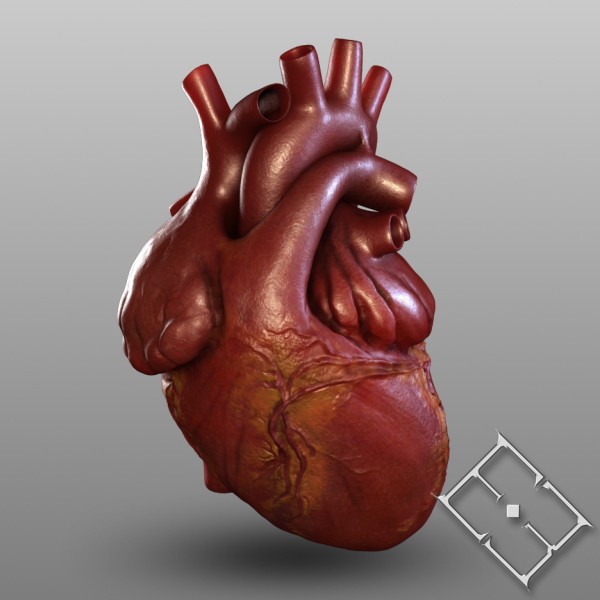

## As every other organ in the body, the heart also has diseases associated with it. There are over 30 distinct heart diseases and many of these types also have their subtypes. 
#### Heart diseases can cause heart failure which in turn leads to death. The virulence of heart diseases brings an exigent need to avoid, diagnose and maintain heart diseases.

I will be doing several analysis and data visualization on a [dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction) I found on Kaggle. 
I will build several models for diagnosing/predicting heart disease and finally select the model with the best performance.

Enough of talk😀, Let's get to it💻 

In [1]:
# Import packages needed for analysis and data visualisation 
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The dataset contains data collected from 918 random individuals, with 12 attributes ascertained from several conducted tests

## Concise details of the dataset columns
Age (28 - 77) in years <br>
Sex (M: Male, F: Female) <br>
ChestPainType (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) <br>
RestingBP (0 - 200) *most frequent value is __120__, mean value is __132__, min value is __0__, max value is __200__*. <br>
Cholestterol (0 - 603) *most frequent value is __0__, mean value is __198__, min value is __0__, max value is __603__*. <br>
FastingBS (0 - 1) *0 counts __704__, 1 counts __214__* <br>
RestingECG (Normal, LVH, ST)  *Normal counts __552__, LVH counts __188__, ST counts __178__* <br>
MaxHR (60 - 202) *most frequent value is __150__, mean value is __136__, min value is __60__, max value is __202__*. <br>
ExerciseAngina (N: No, Y: Yes) <br>
Oldpeak (-2.6 - 6.2) *most frequent value is __0.0__, mean value is __0.8__, min value is __-2.6__, max value is __6.2__*. <br>
ST_Slope (Up, Flat, Down) <br>
HeartDisease (0: Negative or 1: Positive) 

In [2]:
df = pd.read_csv(r"c:\Users\USER\Desktop\MyDatasets\heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Let's explore the data
## Does age affect total cholesterol?

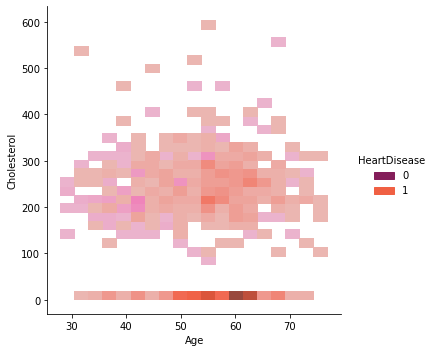

In [3]:
sns.displot(data=df, x='Age', y='Cholesterol', hue='HeartDisease', palette='rocket', cmap='coolwarm')

Apparently, it seems age doesn't affect total cholesterol in our dataset. <br>
And we can see that people in their 60s mostly develop heart disease. 
## Do older people have higher chances of heart disease?
yes, kinda

<Figure size 648x648 with 0 Axes>

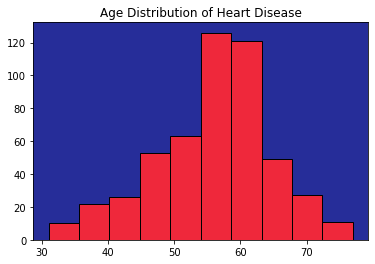

In [4]:
df1 = df[df.HeartDisease==1]  # Dataframe for heart disease patients only.
plt.figure(figsize=(9, 9))
df1.hist(column='Age',color='#ef283b', grid=False, edgecolor='black')
plt.gca().set_facecolor('#262d99')
plt.title('Age Distribution of Heart Disease')
plt.show()

We can see that heart disease positive patients are in their 50s, 60s
## How does Resting blood pressure affect heart disease

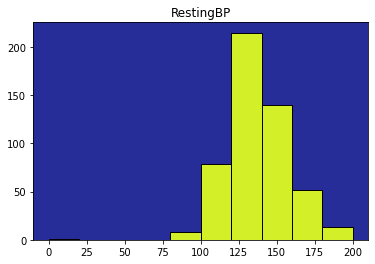

In [5]:
df1.hist(column='RestingBP', color='#d3ef28', grid=False, edgecolor='black')
plt.gca().set_facecolor('#262d99')
plt.show()

Patients with RestingBP between 100-175, have a higher chance of developing heart disease as seen above.

## Let's see how some categorical attributes varies in heart disease

### 1. Chest pain type

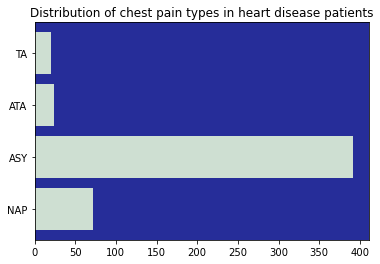

In [9]:
a = list(df1.ChestPainType.unique())
b = []
for i in range(len(a)):
    b.append(list(df1.ChestPainType).count(a[i]))
plt.barh(a, b, color='#cedfd2')
plt.gca().set_facecolor('#262d99')
plt.title('Distribution of chest pain types in heart disease patients')
plt.show()

It's very clear that Asymptomatic is the most common chest pain type with around 400 heart disease patients

### 2. Resting ECG

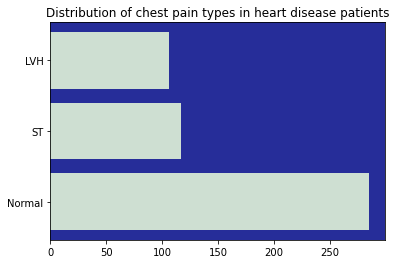

In [10]:
c = list(df1.RestingECG.unique())
d = []
for i in range(len(c)):
    d.append(list(df1.RestingECG).count(c[i]))
plt.barh(c, d, color='#cedfd2')
plt.gca().set_facecolor('#262d99')
plt.title('Distribution of chest pain types in heart disease patients')
plt.show()

Well, it seems to be clear that heart disease is more common with people with _normal ECG_, in our __dataset__.
### 3.  ST Slope

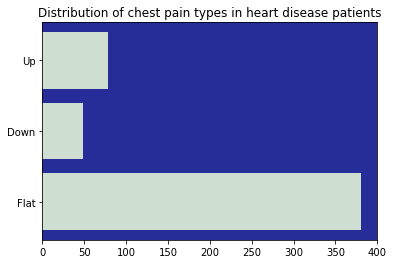

In [21]:
e = list(df1.ST_Slope.unique())
f = []
for i in range(len(e)):
    f.append(list(df1.ST_Slope).count(e[i]))
plt.barh(e, f, color='#cedfd2')
plt.gca().set_facecolor('#262d99')
plt.title('Distribution of chest pain types in heart disease patients')
plt.show()

Interesting! We've learnt that a flat ST slope will likely indicate that the patient has a heart disease.